# Assignment: Libraries

This problem set aims to develop your ability to use non-standard libraries such as NumPy, Pandas, Matplotlib, and requests.  

Please follow all instructions precisely.

## Prerequisite: Install libraries

To do this assignment, you need to have a few libraries installed. You already know how to install libraries in a basic Python virtual environment. In Anaconda, it is even easier.  

Install the following libraries:
1. Pandas
2. Requests
3. Matplotlib

Follow this tutorial to install external libraries for your Jupyter notebook using the Anaconda Navigator.  

https://www.tutorialspoint.com/add-packages-to-anaconda-environment-in-python  

Once you are done, run the following cell. If it does nothing (i.e., if it throws no errors), then you may proceed.

In [ ]:
# NON-EDITABLE CODE CELL
# You may run this cell, but do not edit it.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

## Note

1. There is a good chance that you will have to look up how to do things using these libraries. This is fine. Just credit your sources appropriately.


## Problem 1: Association Rules

### Context

You are a data consultant for a medium-sized grocery. Your job is to help the grocery's marketing and sales team identify the most frequent purchases of customers.  

### 1.1

Read the file `sample order basket.csv` into a Pandas DataFrame called `df`.

In [ ]:
# CODE CELL

# CODE START
import csv

sample_order_basket = []

with open("sample order basket.csv", "r") as problem1_file:
    reader = csv.DictReader(problem1_file)
    for entry in reader:
        sample_order_basket.append(entry)

df = pd.DataFrame(sample_order_basket)

# CODE END

df

### 1.2

Create a "binary table" using a Pandas DataFrame. Save the DataFrame in a variable called `binary_table`.  

The specifications of the binary table are as follows:
1. The data in the binary table is based on the order log contained in `df`.
2. The index values of the binary table are the unique order IDs contained in the sales logs. These are arranged in ascending numerical order. Format the values as `int64`.
3. The column values of the binary table are the unique products contained in the sales logs. These are arranged in alphabetical order. Format the values as `object`.
4. The values of the binary table are either 0 or 1. A value will be 1 if the respective product is present in the respective order, and it will be 0 if the respective product is not present in the respective order. So, for example: if Order 5 ordered an apple, then the cell at row 5, column apple will have the value 1, and every other cell at row 5 will have the value 0.

In [ ]:
# CODE CELL

# CODE START

unique_product_list = []

unique_product_list = df["Product"].unique()
order_numbers = df["ï»¿OrderNum"]


binary_list = []

for b in range(len(df)):
    binary_list.append({})
    for c in range(len(unique_product_list)):
        if unique_product_list[c] == df["Product"][b]:
            binary_list[b].update({unique_product_list[c]: 1})
        else:
            binary_list[b].update({unique_product_list[c]: 0})
            

binary_table = pd.DataFrame(binary_list)
binary_table.index = order_numbers.astype("int64")
print(binary_table.index.unique())
# CODE END

### 1.3

Using `binary_table`, create a report. Store this report in a Pandas DataFrame called `report`.  

The specifications of the report are as follows:
1. The data in the report is based on the data in `binary_table`.
2. The index values of `report` are simply the defaults (i.e., counting up from 0 to whatever number).
3. `report` has two columns: `combination` and `count`. The `combination` column will contain tuples that describe an order combination (e.g., ("apple", "eggplant")). Format the `combination` column as `object`. The `count` column will contain an integer value describing the number of times that this combination appeared in the list of orders. Format the `count` column as `int64`.
4. Sort `reports` by `count` in descending order. The order of combinations within each count bracket does not matter.

You may use any standard library from Python 3.8 that you feel is necessary to complete this item. (This just means that you can use any standard Python library as long as it was in Python 3.8).

In [ ]:
# CODE CELL

# CODE START
binary_table.index = order_numbers.astype("int64")
unique_order_numbers = binary_table.index.unique().copy()
binary_indices = binary_table.index
binary_columns = binary_table.columns
order_combination_list = []
regular_index = []

report_list = []

for g in range(len(binary_table)):    
    regular_index.append(g)
regular_index = np.array(regular_index)
binary_table.index = regular_index.astype("int64")

for d in unique_order_numbers:
    order_combination = []
    for e in range(len(binary_indices)):
        if d == binary_indices[e]:
            for f in binary_columns:
                if binary_table[f][e] == np.int64(1):
                    order_combination.append(f)
        else:
            pass
    if order_combination != []:
        order_combination_list.append(tuple(order_combination))

unique_order_combinations = list(set(order_combination_list))


for h in range(len(unique_order_combinations)):
    combo_count = order_combination_list.count(unique_order_combinations[h])
    report_list.append({"combination": unique_order_combinations[h], "count": np.int64(combo_count)})
    
report_list = sorted(report_list, key = lambda i: i["count"],reverse = True)

report = pd.DataFrame(report_list)
report
#report

# CODE END

## Problem 2: A Plot of the International Space Station's Location

We will only be checking the final output of this problem. 

### Context

You are a budding data scientist aiming to try your new tools on real-world data. As a pet project, you have decided that you want to try plotting the latitude and longitude positions of the International Space Station on a chart.  

An "application programming interface" (API) is an interface (i.e., a point of connection/use) that a program offers to other pieces of software. APIs are how modern computer programs interact. To massively oversimplify the concept, modern applications send and receive HTTP requests and JSON-formatted data to talk to each other.  

We will be using the ISS position data API hosted at http://open-notify.org/Open-Notify-API/ISS-Location-Now/ for this item.  

You are expected to read the documentation of this API for this item.

### 2.1

Use the `requests` library and the `time` library to collect position data of the ISS at intervals of 10 seconds over the course of 30 minutes by sending GET requests to the ISS API endpoint.  

The specifications of this problem are as follows:
1. Send a GET request to the ISS API endpoint once every 10 seconds for 30 minutes. 
2. Each time you send a GET request, append the returned data to a list called `iss_data`.
3. Save all the data to a file called `iss-data.json` so that you do not lose it. You may do this every time you get a request if you wish.
4. Do not modify the returned data per GET request.  
5. The final file `iss-data.json` should contain roughly 180 data points.

We will not be strict about the time intervals. We will only look at the chart that you produce from your data.

In [21]:
# CODE CELL

# CODE START

import requests as req
import time as time
import json
import base64

iss_data = []

for j in range(180):
    data = req.get("http://api.open-notify.org/iss-now.json")
    encoded = data.content
    data = encoded.decode('ascii')
    iss_data.append(data)
    time.sleep(10)


with open("iss-data.json", "w", encoding='utf-8') as jsondump:
    json.dump(iss_data, jsondump)

# CODE END

### 2.2

Using the data you gathered and stored in `iss-data.json`, make a `matplotlib` plot of the location data.  

The specifications of this problem are as follows: 
1. Use the longitude and latitude data contained in `iss-data.json` as your data.
2. Plot this data on a `matplotlib` plot that appropriately visualizes the data. It is up to you what specific plot you want to use as long as we, the human readers of your report, understand the message of your plot.
3. Use latitude as the X axis and longitude as the Y axis.  
4. VERY IMPORTANT: Make sure that the chart displays in your Jupyter notebook before you submit.  

We will only check the chart. We do not care how you make it display as long as you follow the specifications.

     latitude  longitude
0    -26.5918  -101.3135
1    -26.1022  -100.8333
2    -25.6109  -100.3575
3    -25.1176   -99.8859
4    -24.6226   -99.4185
..        ...        ...
175   51.1450    -6.2930
176   51.2381    -5.2626
177   51.3212    -4.2279
178   51.3944    -3.1895
179   51.4548    -2.1975

[180 rows x 2 columns]


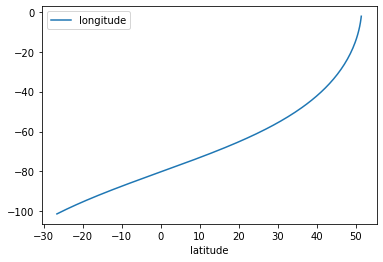

In [67]:
# CODE CELL

# CODE START

import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

with open("iss-data.json", 'r') as jsonfile:
    iss_data = json.load(jsonfile)

for m in range(len(iss_data)):
    iss_data[m] = eval(iss_data[m])
    
iss_position_dict = {"iss_position": []}

for l in range(len(iss_data)):
    for k, v in iss_data[l].items():
        if k == "iss_position":
            iss_position_dict["iss_position"].append({"latitude" : float(iss_data[l]["iss_position"]["latitude"]), "longitude":float(iss_data[l]["iss_position"]["longitude"])})
            
iss_position_dict

iss_df = pd.DataFrame(iss_position_dict['iss_position'])
iss_df.plot(x="latitude", y="longitude")
print (df)

# CODE END